# Dataset Analysis
 This notebook is meant to analyse information about the dataset, like image shape etc. Maybe even which MRIs have been used

## Import libraries

In [2]:
import tensorflow as tf
# import tensorboard
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import ndimage
from pathlib import Path


import sys
sys.path.append(r"/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification")

import brain_mets_classification.custom_funcs as funcs

from tqdm import tqdm

## Display shapes of the images to get the maximum shape for the image preprocessing

In [2]:
path_to_brain_mets_classification = "/Volumes/BrainMets/Rgb_Brain_Mets/brain_mets_classification"
path_to_images_folder = path_to_brain_mets_classification + "/derivatives/preprocessed_20240131-135755"
path_to_tsv = path_to_brain_mets_classification + "/rawdata/participants.tsv"

patients = pd.read_csv(path_to_tsv, sep="\t")

patient_features = patients.copy()
patient_labels = patient_features.pop("primary")

# load niftis
patient_folders = [
    folder for folder in os.listdir(path_to_images_folder) if os.path.isdir(os.path.join(path_to_images_folder, folder))
]

In [3]:
image_shape_array = [()]

image_shape_dict = {}

# make sure that for each patient the images have the same shape
for patient in tqdm(patient_folders):
    preprocessed_images = os.listdir(os.path.join(path_to_images_folder, patient))

    image_shape = ()
    image_with_same_shapes = True

    for image in preprocessed_images:
        nifti_image = nib.load(os.path.join(path_to_images_folder, patient, image))
        array_image = nifti_image.get_fdata()
        if image_shape:
            if not image_shape == array_image.shape:
                print(f"error: image not right shape {image}")
                image_with_same_shapes = False
        else:
            image_shape = array_image.shape

    image_shape_array.append(image_shape)
    image_shape_dict[patient] = image_shape
    
# removes the first (empty) item on the list
image_shape_array.pop(0)



100%|██████████| 492/492 [01:51<00:00,  4.42it/s]


()

average x_values: 139.14227642276424
std x_values: 6.082100997309781
max x_values: 155
min x_values: 119

average y_values: 164.15447154471545
std y_values: 7.16391422318538
max y_values: 185
min y_values: 141

average z_values: 134.54674796747966
std z_values: 9.35761122286389
max z_values: 275
min z_values: 93



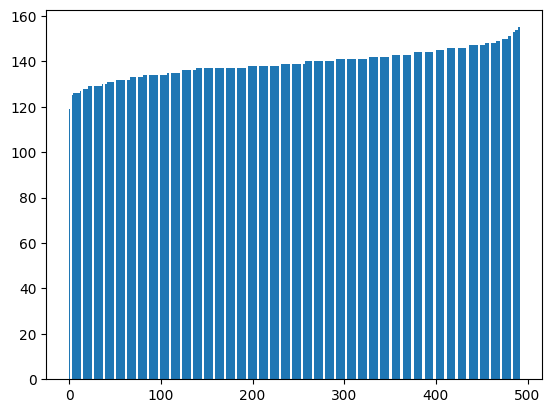

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

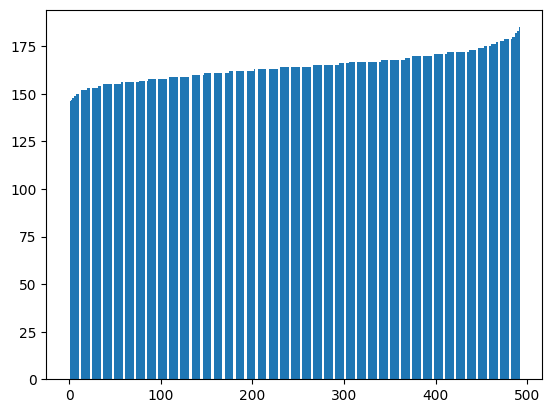

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

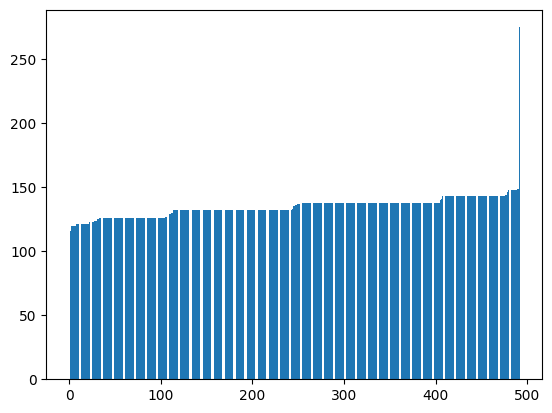

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [4]:
# get average image shape over all the patients

x_values = []
y_values = []
z_values = []

for shape in image_shape_array:
    x_values.append(shape[0])
    y_values.append(shape[1])
    z_values.append(shape[2])

shape_arrays = {"x_values" : x_values,
                "y_values" : y_values,
                "z_values" : z_values}

for key, value_list in shape_arrays.items():
    print(f"average {key}: {np.average(value_list)}")
    print(f"std {key}: {np.std(value_list)}")
    print(f"max {key}: {np.max(value_list)}")
    print(f"min {key}: {np.min(value_list)}")
    print()

x_values.sort()
y_values.sort()
z_values.sort()

x_dict = {}
y_dict = {}
z_dict = {}

for n in range(len(x_values)):
    x_dict[n] = x_values[n]

for n in range(len(y_values)):
    y_dict[n] = y_values[n]

for n in range(len(z_values)):
    z_dict[n] = z_values[n]

plt.bar(x_dict.keys(), x_dict.values())
plt.show()

print(x_dict.keys())
print()
print(x_dict.values())

plt.bar(y_dict.keys(), y_dict.values())
plt.show()

print(y_dict.keys())
print()
print(y_dict.values())

plt.bar(z_dict.keys(), z_dict.values())
plt.show()

print(z_dict.keys())
print()
print(z_dict.values())

Conclusion: 2 patient images are oddly shaped

consider removing the patient with the large z score

In [5]:
# get patient with the large z score

max_z = 0
largest_shape = ()

for value in image_shape_dict.values():
    if value[2] > max_z:
        max_z = value[2]
        largest_shape = value

print(largest_shape)

print(list(image_shape_dict.keys())[list(image_shape_dict.values()).index(largest_shape)])

print(image_shape_dict["sub-01383503"])

(139, 172, 275)
sub-01383503
(139, 172, 275)


consider dropping sub-01383503 for the training set as the z-value of its shape is quite large (275 compared to the average 134)

Image shape for further preprocessing:
(155, 185, 149)

sub-01134825
77


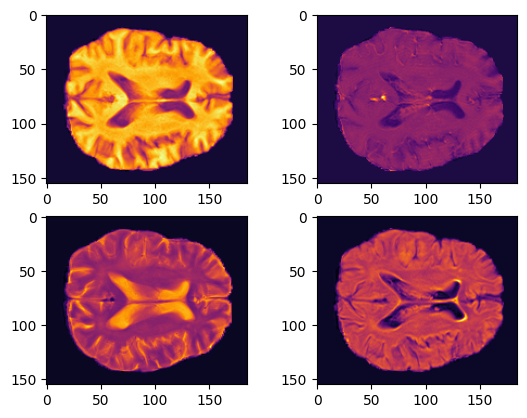

In [132]:
import numpy as np
import nibabel as nib
from skimage import transform
import os
import matplotlib.pyplot as plt

def pad_nifti_images_min_value(file_paths, target_shape):
    padded_images = []

    for file_path in file_paths:
        # Load NIfTI file using nibabel
        img = nib.load(file_path)
        data = img.get_fdata()

        current_shape = data.shape

        # Find the minimum value in the original image
        min_value = data[:,:,0][0][0]

        # Calculate the padding amounts for each dimension
        pad_widths = []
        for target_dim, current_dim in zip(target_shape, current_shape):
            total_padding = max(0, target_dim - current_dim)
            padding_before = total_padding // 2
            padding_after = total_padding - padding_before
            pad_widths.append((padding_before, padding_after))

        # Pad the image using numpy.pad with the minimum value
        padded_data = np.pad(data, pad_widths, mode='constant', constant_values=min_value)

        # Create a new NIfTI image with the padded data
        #padded_img = nib.Nifti1Image(padded_data, img.affine)

        # Save the padded NIfTI image if needed
        #padded_file_path = os.path.join('padded_min_value', os.path.basename(file_path))
        #nib.save(padded_img, padded_file_path)

        padded_images.append(padded_data)

    return padded_images

patient_nmbr = np.random.randint(0, 460)
print(patient_folders[patient_nmbr])

images = os.listdir(os.path.join(path_to_images_folder, patient_folders[patient_nmbr]))
images = [ path_to_images_folder + "/" + patient_folders[patient_nmbr] + "/" + image for image in images]

padded_images = pad_nifti_images_min_value(images, target_shape=(155, 185, 149))

slice = np.random.randint(0, 149)
print(slice)

colormap = "inferno"

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(padded_images[0][:,:,slice], cmap=colormap)
# axs[0, 0].title = images[0]
axs[0, 1].imshow(padded_images[1][:,:,slice], cmap=colormap)
# axs[0, 1].title = images[1]
axs[1, 0].imshow(padded_images[2][:,:,slice], cmap=colormap)
# axs[1, 0].title = images[2]
axs[1, 1].imshow(padded_images[3][:,:,slice], cmap=colormap)
# axs[1, 1].title = images[3]

In [ ]:
import nibabel as nib
import numpy as np

def load_and_merge_sequences(images):

    # Convert the list of sequences into a numpy array with the fourth axis
    merged_array = np.stack(images, axis=-1)

    return merged_array

# Example usage:
# Replace the file_paths list with the paths to your NIfTI files for each sequence
file_paths = ['path_to_T1w.nii', 'path_to_T2w.nii', 'path_to_T2-FLAIR.nii', 'path_to_T1ce.nii']

merged_data = load_and_merge_sequences(file_paths)

# Now, merged_data is a numpy array with shape (x, y, z, 4), where the fourth axis represents the different MRI sequences

tf.Tensor(-1.6792654, shape=(), dtype=float32)


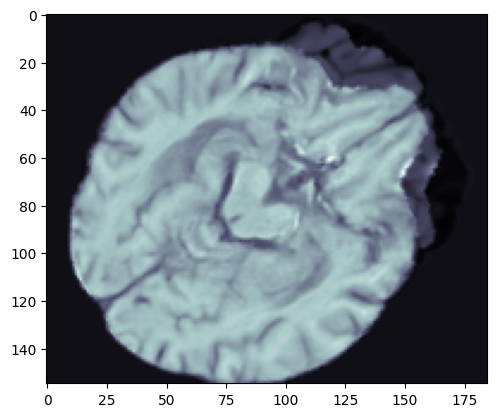

In [156]:
# get four paths to images

patient_nmbr = 40



images = os.listdir(os.path.join(path_to_images_folder, patient_folders[patient_nmbr]))
images = [ path_to_images_folder + "/" + patient_folders[patient_nmbr] + "/" + image for image in images]

merged_image = funcs.pad_and_stack_nifit_images(
    file_paths = images,
    target_shape = (155, 185, 149)
)

rearranged_image = np.moveaxis(merged_image, [2], [0])

rotation_layer = tf.keras.layers.RandomRotation(factor = (-0.1, 0.1), fill_mode = "nearest")
rotated_img = rotation_layer(rearranged_image)

normalizing_layer = tf.keras.layers.Normalization()
normalizing_layer.adapt(rotated_img)
normalized_img = normalizing_layer(rotated_img)

#randInt = np.random.randint(-90, 90)

#tf_image = tf.convert_to_tensor(merged_image)

# def tf_rotate(image, angle):
#     return ndimage.rotate(
#         input = image,
#         angle = angle,
#         axes = (0,1),
#         reshape = False,
#         mode = "nearest")

# rotated_img = ndimage.rotate(
#     input = merged_image,
#     angle = randInt,
#     axes = (0,1),
#     reshape = False,
#     mode = "nearest"
# )

slice = 55

plt.imshow(normalized_img[slice,:,:,0], cmap="bone")

print(tf.reduce_min(normalized_img))

# Create Excel Sheet based only with the patients in the dataset

Paths to the different files

In [3]:
path_to_patients_tsv = Path("/Volumes/BrainMets/Rgb_Brain_Mets/brain_mets_classification/rawdata/participants.tsv")

path_to_preprocessed_images = Path("/Volumes/BrainMets/Rgb_Brain_Mets/brain_mets_classification/derivatives/preprocessed_20240131-135755")

path_to_excel = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/Dateien/Metas_PatID_Full_SMI private Datei.xlsx")

Remove 2 unfit patients (due to unfit MRI file sizes)

In [5]:
training_patients = pd.read_csv(path_to_patients_tsv, sep="\t", index_col=False)

# drop patient sub-01383503
patient_to_drop_index = training_patients.index[training_patients["participant_id"] == "sub-01383503"]
training_patients.drop(index=patient_to_drop_index, inplace=True)
training_patients.reset_index(drop=True, inplace=True)
#training_patients = training_patients.sample(frac=1) #shuffles the dataset

print(f"Before removing unfit files: {len(training_patients)}")
patient_files_list = os.listdir(path_to_preprocessed_images)
for index, row in training_patients.iterrows():
    if training_patients["participant_id"][index] not in patient_files_list:
        training_patients.drop(index=index, inplace=True)

print(f"After removing unfit files: {len(training_patients)}")
training_patients.reset_index(drop=True, inplace=True)

Before removing unfit files: 493
After removing unfit files: 491


In [6]:
print(training_patients["participant_id"])

0      sub-01005097
1      sub-01005630
2      sub-01006290
3      sub-01009590
4      sub-01015961
           ...     
486    sub-93003757
487    sub-95001254
488    sub-96003928
489    sub-96004436
490    sub-99000041
Name: participant_id, Length: 491, dtype: object


compare the excel sheet with the training patients and only keep the training patients\
then create new excel sheet based on that

In [7]:
# remove "sub-" prefix for the patient IDs and convert to Int
training_patients["participant_id"] = training_patients["participant_id"].str.slice_replace(0, 4, "")
training_patients["participant_id"] = training_patients["participant_id"].astype(int)
training_patients["participant_id"]

0       1005097
1       1005630
2       1006290
3       1009590
4       1015961
         ...   
486    93003757
487    95001254
488    96003928
489    96004436
490    99000041
Name: participant_id, Length: 491, dtype: int64

In [22]:
# read excel sheet
excel_patients  = pd.read_excel(path_to_excel)

excel_patients["ID"] = excel_patients["ID"].astype(int, errors="ignore")
# replaces NaN with 9999999
excel_patients["ID"] = excel_patients["ID"].replace("NaN", pd.NA).fillna(999999).astype(int)

print(excel_patients["ID"])


0      95001254
1       1387984
2       1373703
3       1387932
4       1391534
         ...   
749     1795656
750    90003334
751     1800184
752     2202736
753     1152379
Name: ID, Length: 754, dtype: int64


In [19]:
# get duplicates
duplicates = excel_patients["ID"].duplicated()

In [23]:
print(len(excel_patients["ID"]))

754


In [26]:
# for each row in excel sheet, check if is in training patients, if not drop row

counter = 0

for num, row in excel_patients.iterrows():
    excel_id = int(excel_patients["ID"][num])
    training_ids = training_patients["participant_id"].drop_duplicates().values
    
    if not excel_id in training_ids:
        excel_patients.drop([num], inplace=True)

print(counter)


0


In [27]:
len(excel_patients)

499

Safes pandas Dataframe as Excel Sheet (still unformatted)

In [30]:
excel_patients.to_excel("/Users/LennartPhilipp/Desktop/Uni/Prowiss/Dateien" / Path("training_patients_with_duplicates.xlsx", index=False))